In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1WNPy3V2cGGR0WvS4ip_vnesO9-ss31wX

Downloading...
From: https://drive.google.com/uc?id=1WNPy3V2cGGR0WvS4ip_vnesO9-ss31wX
To: /content/BankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 143MB/s]


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle

## 1.1) Upload file

In [ ]:
# Read the CSV file
df = pd.read_csv('BankChurners.csv')

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# Extract feature names
feature_names = df.columns.tolist()
num_features = df.shape[1]

# Number of samples
num_samples = df.shape[0]

# Output the results
print("Number of features:", num_features, ", Feature Names: ", feature_names)
print("Number of Samples: ", num_samples)

Number of features: 23 , Feature Names:  ['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
Number of Samples:  10127


## 1.2) PairPlot

In [ ]:
# Extract numeric features
numeric_vars = df.select_dtypes(include=['number']).columns.tolist()
numeric_vars

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

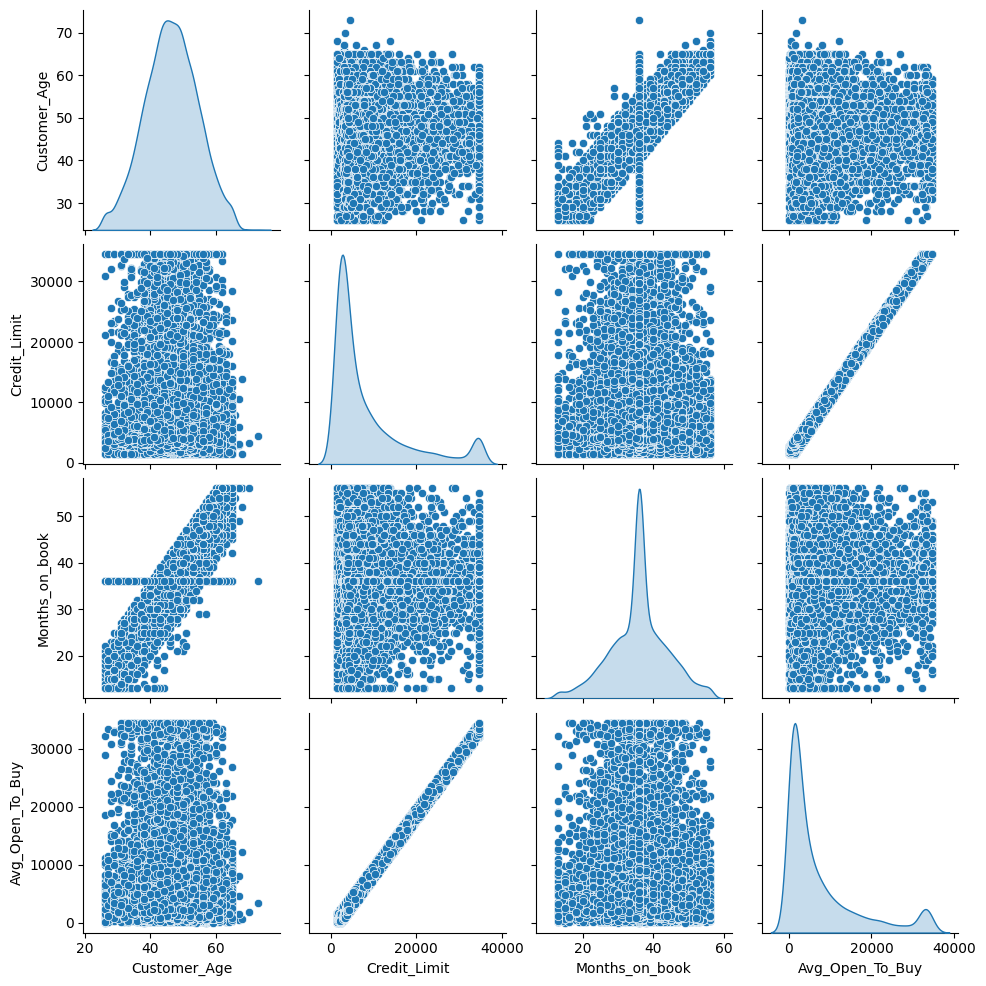

In [ ]:
# Display Pairplot
sns.pairplot(df,
             vars = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Open_To_Buy'],
             diag_kind='kde')

## 1.3) HeatMap

In [ ]:
# Extract categorical features and continuous features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Continuous Features:", continuous_features)

Categorical Features: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Continuous Features: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [ ]:
# Normalization
categorical_cols = ['Gender', 'Education_Level', 'Card_Category']
continuous_cols = ['Customer_Age', 'Dependent_count', 'Credit_Limit']

encoder = OneHotEncoder(sparse_output=False, drop='first')
normalized_categorical = pd.DataFrame(
    encoder.fit_transform(df[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols)
)

scaler = MinMaxScaler()
normalized_continuous = pd.DataFrame(
    scaler.fit_transform(df[continuous_cols]),
    columns=continuous_cols
)

normalized_df = pd.concat([encoded_categorical, normalized_continuous], axis=1)

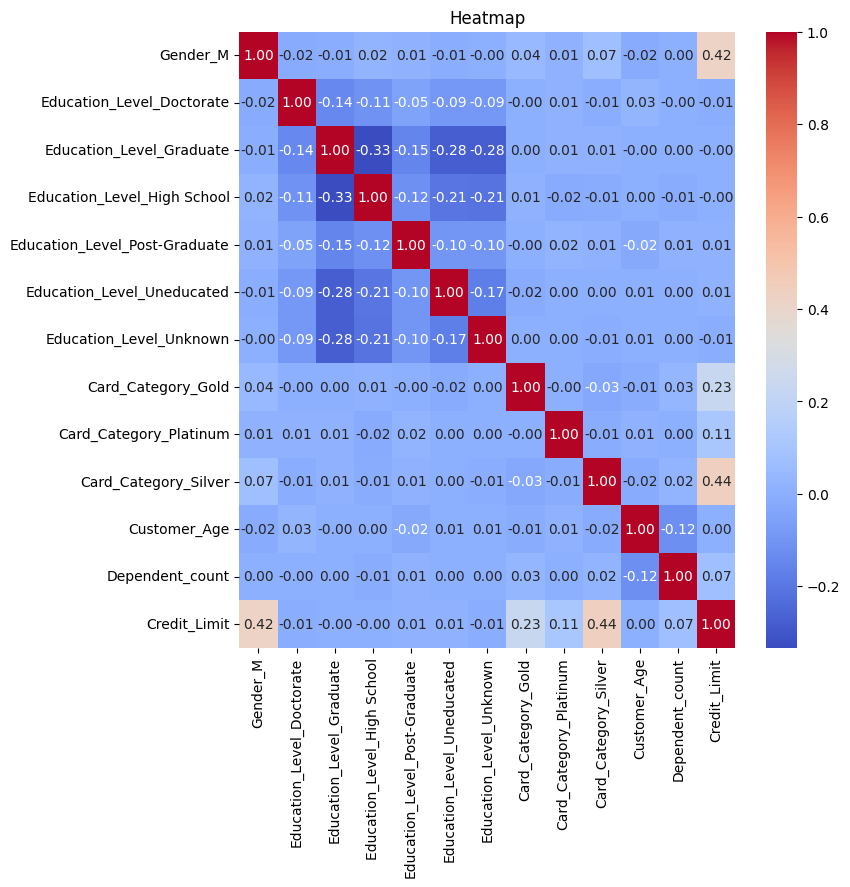

In [ ]:
# Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(normalized_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap')
plt.show()

## 1.4) Null data

In [ ]:
null_counts = df.isnull().sum()
null_counts

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


## 1.5) Attrition Flag

In [ ]:
num_classes = df['Attrition_Flag'].nunique()
num_classes

2

In [ ]:
class_names = df['Attrition_Flag'].unique()
class_names

array(['Existing Customer', 'Attrited Customer'], dtype=object)

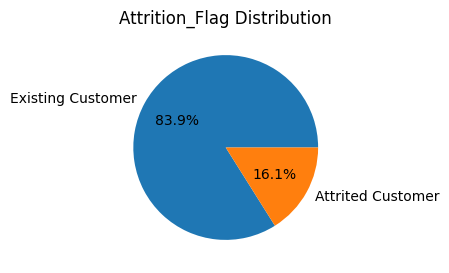

In [ ]:
distribution = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(3, 3))
distribution.plot.pie(autopct='%1.1f%%')
plt.title('Attrition_Flag Distribution')
plt.ylabel('')
plt.show()


## 1.6) Model

In [19]:
# Read dataset
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


### Normalization

In [20]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features.remove("Attrition_Flag")
target = 'Attrition_Flag'

In [21]:
# OneHotEncoder for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_features])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features))

# MinMaxScaler for numeric features
scaler = MinMaxScaler()
scaled_continuous = scaler.fit_transform(df[continuous_features])
scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=continuous_features)

# OrdinalEncoder for the target variable
ordinal_encoder = OrdinalEncoder()
encoded_target = ordinal_encoder.fit_transform(df[[target]]).ravel()

# Combine processed data
df = pd.concat([scaled_continuous_df, encoded_categorical_df], axis=1)

# Split the data
X = df
y = encoded_target
X

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.504929,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.920398,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.049060,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.514130,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.008517,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.534544,0.510638,0.4,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.062266,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10123,0.021255,0.319149,0.4,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.060499,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10124,0.070048,0.382979,0.2,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10125,0.077539,0.085106,0.4,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.152928,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Split data (Train 60%, Validation 20%, and Test 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=3, stratify=y_temp)

# Hyperparameter tuning using Validation
best_model = None
best_params = None
best_accuracy = 0

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Manual Grid Search
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                # train the model
                model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=3
                )
                model.fit(X_train, y_train)

                # Evaluate on Validation set
                val_predictions = model.predict(X_val)
                accuracy = np.mean(val_predictions == y_val)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best Validation Accuracy: 1.0


In [25]:
# Train Evaluation
y_train_pred = best_model.predict(X_train)
print("\nTrain Performance:")
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix (Train):\n", confusion_matrix(y_train, y_train_pred))

# Validation Evaluation
y_val_pred = best_model.predict(X_val)
print("\nValidation Performance:")
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix (Validation):\n", confusion_matrix(y_val, y_val_pred))

# Test Evaluation
y_test_pred = best_model.predict(X_test)
print("\nTest Performance:")
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))


Train Performance:
Classification Report (Train):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       976
         1.0       1.00      1.00      1.00      5100

    accuracy                           1.00      6076
   macro avg       1.00      1.00      1.00      6076
weighted avg       1.00      1.00      1.00      6076

Confusion Matrix (Train):
 [[ 976    0]
 [   0 5100]]

Validation Performance:
Classification Report (Validation):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       325
         1.0       1.00      1.00      1.00      1700

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025

Confusion Matrix (Validation):
 [[ 325    0]
 [   0 1700]]

Test Performance:
Classification Report (Test):
               precision    recall  f1-score   support

         0.0  

## Balance the dataset using SMOTE

In [32]:
smote = SMOTE(random_state=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=3)

# Step 5: Train the model on balanced data
model_balanced = RandomForestClassifier(n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=3)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate the balanced model
print("Balanced Model Performance:")
print("Train Classification Report (Balanced):\n", classification_report(y_train_balanced, model_balanced.predict(X_train_balanced)))
print("Validation Classification Report (Balanced):\n", classification_report(y_val, model_balanced.predict(X_val)))
print("Test Classification Report (Balanced):\n", classification_report(y_test, model_balanced.predict(X_test)))

print("Confusion Matrix (Train, Balanced):\n", confusion_matrix(y_train_balanced, model_balanced.predict(X_train_balanced)))
print("Confusion Matrix (Validation, Balanced):\n", confusion_matrix(y_val, model_balanced.predict(X_val)))
print("Confusion Matrix (Test, Balanced):\n", confusion_matrix(y_test, model_balanced.predict(X_test)))


Balanced Model Performance:
Train Classification Report (Balanced):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5100
         1.0       1.00      1.00      1.00      5100

    accuracy                           1.00     10200
   macro avg       1.00      1.00      1.00     10200
weighted avg       1.00      1.00      1.00     10200

Validation Classification Report (Balanced):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       325
         1.0       1.00      1.00      1.00      1700

    accuracy                           1.00      2025
   macro avg       1.00      1.00      1.00      2025
weighted avg       1.00      1.00      1.00      2025

Test Classification Report (Balanced):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       326
         1.0       1.00      1.00      1.00      1700

    accuracy               

## Score question) PairPlot

In [49]:
# Read dataset
df = pd.read_csv('BankChurners.csv')
df_filtered = df[['Attrition_Flag']]
df_filtered

,Attrition_Flag
0,Existing Customer
1,Existing Customer
2,Existing Customer
3,Existing Customer
4,Existing Customer
...,...
10122,Existing Customer
10123,Attrited Customer
10124,Attrited Customer
10125,Attrited Customer


In [50]:
encoded_att = pd.get_dummies(df_filtered, columns=['Attrition_Flag'], drop_first=False)
encoded_att

,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
10122,False,True
10123,True,False
10124,True,False
10125,True,False


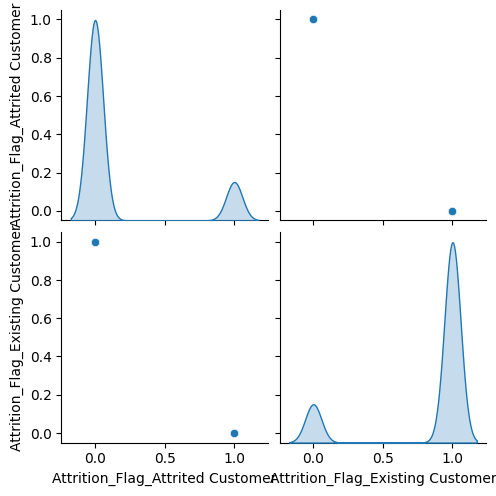

In [52]:
# Display Pairplot
sns.pairplot(encoded_att, diag_kind='kde')